In [1]:
!pip install transformers

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
url = 'try01.jpg'
image = Image.open(url).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


2023-10-11 09:14:32.891968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 09:14:33.677848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/home/shivam/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [3]:
!pip install pytesseract

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


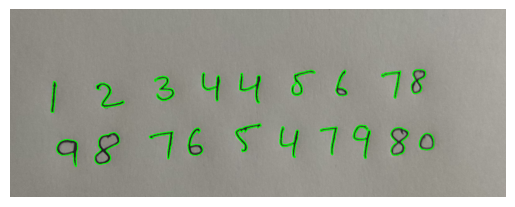

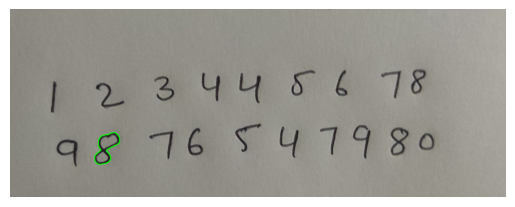

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('try01.jpg')

# Preprocess
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

# Draw all contours on image copy
contour_img = image.copy()
cv2.drawContours(contour_img, cnts, -1, (0,255,0), 2)

# Display contour image using matplotlib
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Extract table contour
table_contour = max(cnts, key=cv2.contourArea)

# Draw table contour on image copy
table_img = image.copy()
cv2.drawContours(table_img, [table_contour], -1, (0,255,0), 2)

# Display table contour image using matplotlib
plt.imshow(cv2.cvtColor(table_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [9]:
# Get table contour coordinates
x,y,w,h = cv2.boundingRect(table_contour)

# Create mask from contour
mask = np.zeros(image.shape[:2], np.uint8)
cv2.drawContours(mask, [table_contour], -1, 255, -1)

# Extract table image using bitwise-and
table_image = cv2.bitwise_and(image, image, mask=mask)

# Crop table image to contour bounding box
table_image = table_image[y:y+h, x:x+w]

# Display extracted table image
cv2.imshow(table_image)
cv2.waitKey(0)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [10]:
!pip install paddlepaddle

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [11]:
!pip install paddleocr

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for paddleocr from https://files.pythonhosted.org/packages/8f/d0/1a2f9430f61781beb16556182baa938e8f93c8b46c27ad5865a5655fae05/paddleocr-2.7.0.3-py3-none-any.whl.metadata
  Using cached paddleocr-2.7.0.3-py3-none-any.whl.metadata (26 kB)
  Obtaining dependency information for visualdl from https://files.pythonhosted.org/packages/ea/b5/37726c750a4f4598660998327c3566b2d2ed5a1a5f44e9f0dde875602447/visualdl-2.5.3-py3-none-any.whl.metadata
  Using cached visualdl-2.5.3-py3-none-any.whl.metadata (25 kB)
  Obtaining dependency information for rapidfuzz from https://files.pythonhosted.org/packages/27/24/4aeecf7f516cb41187e83e5fd80839b6dffc165f72b89259e6bb9a63d032/rapidfuzz-3.4.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  U

  Obtaining dependency information for Babel>=2.12 from https://files.pythonhosted.org/packages/ff/37/b0241795c3a320a3def948cd0d06daf70310e7fea1d8fda312629bc22ea9/Babel-2.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for pycryptodome>=3.8.0 from https://files.pythonhosted.org/packages/00/e6/73931df4046e34a6354d323b4a5b5c18e5184f4a08687806ee3353c81a6b/pycryptodome-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pycryptodome-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached paddleocr-2.7.0.3-py3-none-any.whl (465 kB)
Using cached Pillow-10.0.1-cp311-cp311-manylinux_2_28_x86_64.whl (3.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.4 MB/s eta 0:00:00a 0:00:01
Using cached visualdl-2.5.3-py3-none-any.whl (6

In [12]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-10-11 09:41:18--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 91.189.91.83, 91.189.91.82, 185.125.190.36, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M   771KB/s    in 1.7s    

2023-10-11 09:41:21 (771 KB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

/bin/bash: /home/shivam/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
[sudo] password for shivam: 


In [13]:
from paddleocr import PaddleOCR

# Initialize PaddleOCR with English language support and angle classification
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to the image you want to perform OCR on
img_path = '/content/Screenshot 2023-10-09 at 10.11.34 AM.png'

# Perform OCR on the image
result = ocr.ocr(img_path, cls=True)

# Iterate through the results and print the detected text lines
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)


ModuleNotFoundError: No module named 'paddleocr'

In [ ]:
for index, res in enumerate(result):
  print(res[index][1][0])

In [ ]:
df

In [ ]:
!pip install transformers

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
def get_text(url):
  image = Image.open(url).convert("RGB")

  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text


Saving Screenshot 2023-09-27 at 12.20.34 AM.png to Screenshot 2023-09-27 at 12.20.34 AM (1).png


(1, 1)


(1, 1)


(1, 2)


(31, 10)


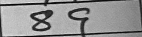

(37, 142)


(31, 8)


(1, 1)


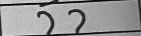

(36, 141)


(29, 6)


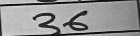

(36, 140)


(30, 4)


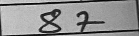

(36, 139)


(17, 2)


(4, 10)


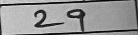

(35, 138)


(2, 1)


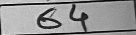

(35, 136)


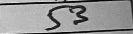

(34, 133)


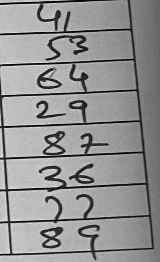

(262, 160)


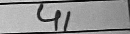

(34, 130)


(3, 69)


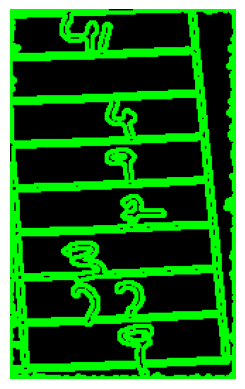

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the image in Google Colab
uploaded = files.upload()

# Assuming the uploaded file is named "image.png"
image_path = next(iter(uploaded))

# Load the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11, 2.0)
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty canvas to draw the contours on
contour_image = np.zeros_like(image)

# List to store extracted digits
extracted_digits = []

con = 0
# Loop through the contours
for i, contour in enumerate(contours):
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the digit from the original image using the bounding box
    digit = image[y:y+h, x:x+w]

    # Save the digit image with a unique filename (e.g., "digit0.png", "digit1.png", etc.)
    filename = f"digit{i}.png"
    cv2.imwrite(filename, digit)

    digit_gray = cv2.cvtColor(digit, cv2.COLOR_BGR2GRAY)
    cv2_imshow(digit_gray)

    pil_image = Image.fromarray(digit_gray)
    # Convert grayscale to RGB
    digit_rgb = pil_image.convert('RGB')
    print(digit_gray.shape)
    # Append the extracted digit to the list
    extracted_digits.append(digit)

    # Draw the contour on the canvas
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

# Display the image with contours using Matplotlib
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Now, you have a list of extracted digits in the 'extracted_digits' variable for further processing or recognition.


In [ ]:
extracted_digits

In [ ]:
for i in range(len(extracted_text)):
    print(f"OCR Result for Digit {i + 1}: {extracted_text[i]}")
    cv2_imshow(np.array(extracted_digits[i]))


NameError: ignored

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from PIL import Image
import os
list1 = []

# Iterate through files in the current directory
for i in os.listdir():
    if i.startswith('digit'):
        # Open the image using PIL
        try:
            with Image.open(i) as img:
                # Check if the image is not empty (has non-zero dimensions)
                if img.size[0] > 10 and img.size[1] > 10:
                    list1.append(i)
        except Exception as e:
            # Handle any exceptions that may occur when opening the image
            print(f"Error processing {i}: {str(e)}")

# Now, list1 contains the paths of non-empty images that start with 'digit'


In [ ]:
list1

['digit4.png',
 'digit19.png',
 'digit7.png',
 'digit18.png',
 'digit11.png',
 'digit16.png',
 'digit17.png',
 'digit14.png',
 'digit9.png']

In [ ]:
for i in list1:
  print(get_text(i))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


sigr


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


41


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


52


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


1 1 )


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


87


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


64


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


53.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


29


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


36


In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/IMG_9517.HEIC")

In [ ]:
print(img)

None
